we need always transform catagorial data into numerical data

catagorical have 2 types:



1.   Nominal
2.   ordinal





*  Ordinal meanse in our data one order is follows like Good/Bad

*   Nominal meanse not any order follows like Male/Female both are same





*   if we have ordinal data then we have to use ordinal encoder
*   if we have nominal data then we have to use one-hot encoding



**OneHotEncoding**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/sample_data/cars.csv')
data

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [3]:
data.columns

Index(['brand', 'km_driven', 'fuel', 'owner', 'selling_price'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


array([[<Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'selling_price'}>]], dtype=object)

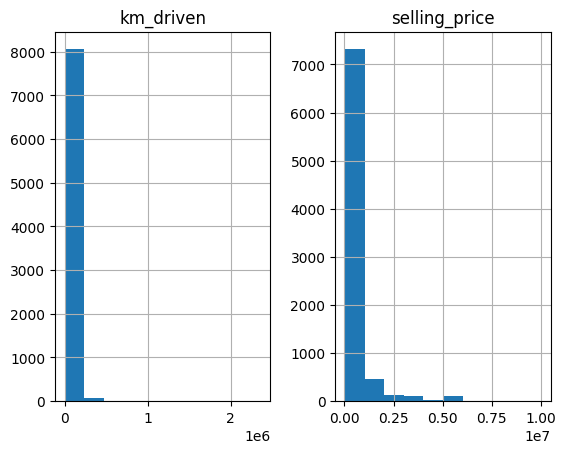

In [5]:
data.hist()

In [6]:
data['brand'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [7]:
data['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [8]:
data['brand'].nunique()

32

In [9]:
data['fuel'].nunique()

4

In [10]:
data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [11]:
data['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [12]:
data['owner'].value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

### **1. OneHotEncoding Using Pandas**

in pandas we have one function called 'get_dummies' using this we can perform OneHotEncoding

In [13]:
pd.get_dummies(data,columns=['fuel','owner'])  # we get total 12 column 4 for fuel column and 5 for owner column

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


### **K-1 Encoding (Multicolnarity)**

In [14]:
pd.get_dummies(data,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


### **3. OneHotEncoding using SKlearn**

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,0:4],data.iloc[:,-1],test_size=0.2,random_state=2)

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
ohe = OneHotEncoder()

In [18]:
ohe.fit_transform(X_train[['fuel','owner']])


<6502x9 sparse matrix of type '<class 'numpy.float64'>'
	with 13004 stored elements in Compressed Sparse Row format>

In [19]:
X_train_new = ohe.fit_transform(X_train[['fuel','owner']]).toarray()
X_train_new

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [20]:
X_test_new = ohe.transform(X_test[['fuel','owner']])

In [21]:
X_test_new.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [22]:
X_train[['brand','km_driven']]

,brand,km_driven
5571,Hyundai,35000
2038,Jeep,60000
2957,Hyundai,25000
7618,Mahindra,130000
6684,Hyundai,155000
...,...,...
3606,Ford,35000
5704,Maruti,120000
6637,Tata,15000
2575,Maruti,32500


In [23]:
X_train[['brand','km_driven']].values

array([['Hyundai', 35000],
       ['Jeep', 60000],
       ['Hyundai', 25000],
       ...,
       ['Tata', 15000],
       ['Maruti', 32500],
       ['Isuzu', 121000]], dtype=object)

In [24]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Hyundai', 35000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Jeep', 60000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Hyundai', 25000, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Tata', 15000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 32500, 0.0, ..., 1.0, 0.0, 0.0],
       ['Isuzu', 121000, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [25]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new)).shape

(6502, 11)

## **4. OeHotEncoding with top categories**

In [26]:
data['brand']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: brand, Length: 8128, dtype: object

In [28]:
counts = data['brand'].value_counts()
counts

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [29]:
data['brand'].nunique()
threshold = 100

In [30]:
repl = counts[counts <= threshold].index   # select only those category whos value_count is less than 100

In [31]:
repl

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object')

In [32]:
pd.get_dummies(data['brand'].replace(repl,'uncommon'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,1,0,0,0
